In [11]:
import pandas as pd
spam = pd.read_csv("../_datasets/spambase.csv")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = spam.drop("class", axis=1)
y = spam["class"] == 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, 
    shuffle=True, random_state=302
    )

dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(X_train, y_train)
print(f"Accuracy is {dtree.score(X_test, y_test):.2%}")

Accuracy is 93.27%


In [13]:
p_hat = dtree.predict_proba(X_test)

from sklearn.metrics import roc_curve
fp, tp, theta = roc_curve(y_test, p_hat[:, 1])

In [14]:
results = pd.DataFrame( {"FP rate":fp, "TP rate":tp, "Threshold":theta} )

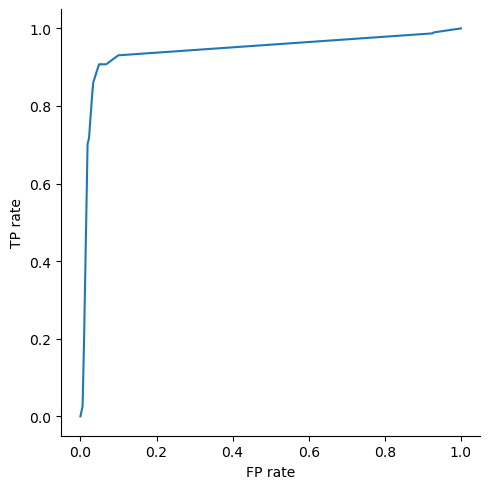

In [15]:
import seaborn as sns
sns.relplot(data=results, x="FP rate", y="TP rate", kind="line");

In [16]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, p_hat[:, 1])
print(f"AUC for decision tree is {auc:.3f}")

AUC for decision tree is 0.942


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier(n_neighbors=7)
pipe = make_pipeline(RobustScaler(), knn)
pipe.fit(X_train, y_train)
p_hat = pipe.predict_proba(X_test)
auc = roc_auc_score(y_test, p_hat[:, 1])
print(f"AUC for kNN is {auc:.3f}")

AUC for kNN is 0.956


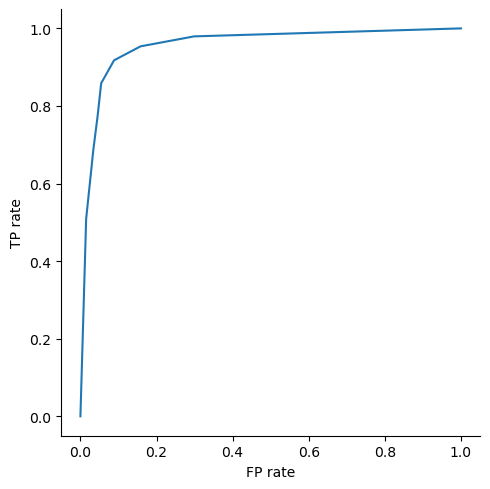

In [18]:
fp, tp, _ = roc_curve(y_test, p_hat[:, 1])
results = pd.DataFrame( {"FP rate":fp, "TP rate":tp} )
sns.relplot(data=results, x="FP rate", y="TP rate", kind="line");